<a href="https://colab.research.google.com/github/Susanna-Salata/goit-DS/blob/main/GoIT_DS_HomeWork_5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

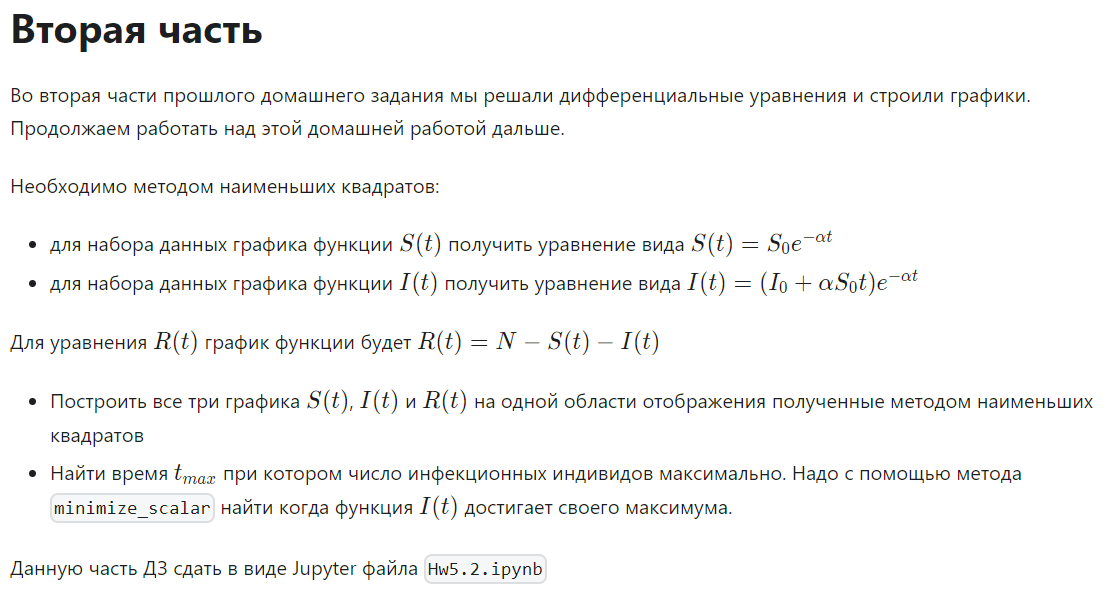

In [1]:
from scipy.interpolate import griddata
from scipy.optimize import minimize, minimize_scalar
from scipy.integrate import solve_ivp
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
alpha = 0.5
beta = 0.3
N = 1000000
S0 = 990000
I0 = 7000
R0 = 3000

In [7]:
def S_func(t, S0=S0, alpha=alpha):
    return S0 * np.exp(-alpha * t)

In [8]:
def I_func(t, I0=I0, S0=S0, alpha=alpha):
    return (I0 + alpha * S0 * t) * np.exp(-alpha * t)

In [9]:
def R_func(t, N=N):
    return N - S_func(t) - I_func(t)

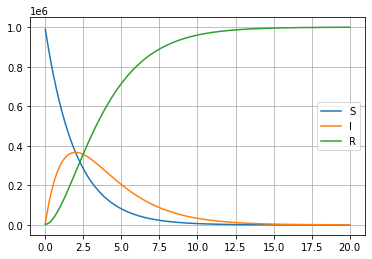

In [18]:
x = np.linspace(0, 20, 1000)
s = S_func(x)
i = I_func(x)
r = R_func(x)

plt.grid()
plt.plot(x, s, label='S')
plt.plot(x, i, label="I")
plt.plot(x, r, label='R')
plt.legend(loc="right")
plt.show()

In [20]:
result = minimize_scalar(lambda x, I0, S0, alpha: -I_func(x), bounds=(0, 20), args=(I0, S0, alpha))
result

     fun: -366784.9284305366
    nfev: 14
     nit: 9
 success: True
       x: 1.9858585752092015